In [84]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [85]:
#Import CSV file

movie_df= pd.read_csv(r"C:\Users\Asus\Downloads\IMDb Movies India.csv\IMDb Movies India.csv",  encoding= 'unicode_escape')

In [86]:
# Checking how many rows and column in dataframe

movie_df.shape

(15509, 10)

In [87]:
# First 5 rows and columns

movie_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [89]:
# Last 5 rows and columns

movie_df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [90]:
# row name of dataframe

movie_df.index

RangeIndex(start=0, stop=15509, step=1)

In [91]:
# Checking columns name

movie_df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [92]:
# Basic information about dataframe

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [93]:
# describe of data in dataframe 

movie_df.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [94]:
# Checking Null Values

movie_df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Data Cleaning

In [95]:
# Removing '()' from 'Year' column

movie_df['Year'] = movie_df['Year'].str.replace(r"\(|\)", "")

In [96]:
# Removing '()' from 'Year' column

movie_df['Year'] = movie_df['Year'].str.replace(r"\(|\)", "")

In [97]:
# Droping subset 

movie_df.dropna(subset=['Rating'], inplace=True)

In [98]:
# Checking null values in columns 

movie_df.isnull().sum()

Name           0
Year           0
Duration    2068
Genre        102
Rating         0
Votes          0
Director       5
Actor 1      125
Actor 2      200
Actor 3      292
dtype: int64

In [99]:
movie_df.dropna(subset=['Genre'], inplace=True)

In [100]:
movie_df.shape

(7817, 10)

In [101]:
# Filling null values in "Director,Actor 1', 'Actor 2', 'Actor 3" Columns with a placeholder like "Unknown."

movie_df[['Director', 'Actor 1', 'Actor 2', 'Actor 3']] = movie_df[['Director', 'Actor 1', 'Actor 2', 'Actor 3']].fillna('Unknown')


In [102]:
movie_df.isnull().sum()

Name           0
Year           0
Duration    1997
Genre          0
Rating         0
Votes          0
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64

In [103]:
# Striping 'min' from 'Duration' column 

movie_df['Duration']=movie_df['Duration'].str.strip('min')

In [104]:
#Changing Data Type of "Duration" column

movie_df['Duration'] = pd.to_numeric(movie_df['Duration'], errors='coerce', downcast='integer')

In [105]:
# Fill missing values in the "Duration" column with the mean

movie_df['Duration'].fillna(movie_df['Duration'].mean(),inplace=True)

In [106]:
movie_df.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Exploratory Data Analysis

### Top 10 Movie by rating 

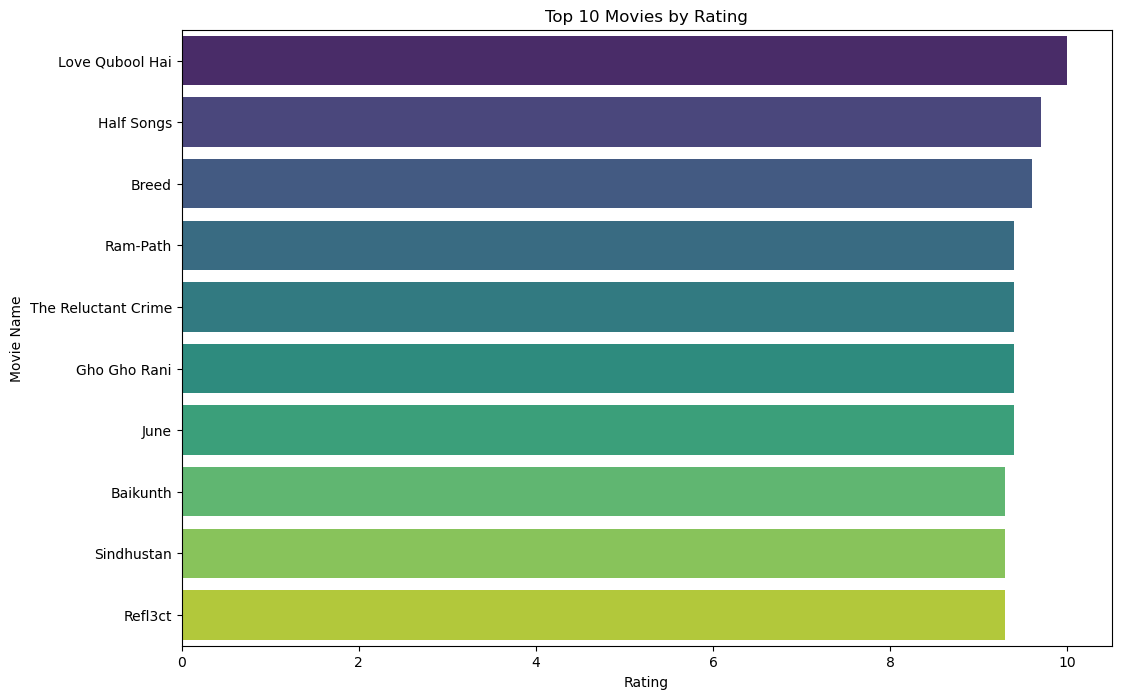

In [107]:
# Sort the DataFrame by ratings in descending order
top_movies = movie_df.sort_values(by='Rating', ascending=False).head(10)

# Create a bar plot for the top 10 movies
plt.figure(figsize=(12, 8))
sns.barplot(x='Rating', y='Name', data=top_movies, palette='viridis')
plt.title('Top 10 Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Movie Name')
plt.show()

### Number of Movies Released By Year Range

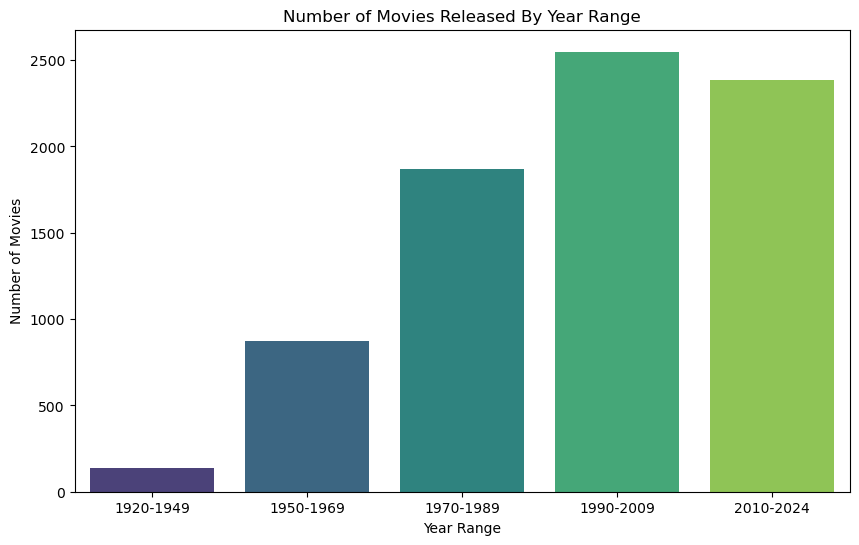

In [108]:
# Convert 'Year' column to datetime type
movie_df['Year'] = pd.to_datetime(movie_df['Year'], errors='coerce')

# Define the year ranges
year_ranges = ['1920-1949', '1950-1969', '1970-1989', '1990-2009', '2010-2024']

# Create a new column 'Year Range' and categorize the data into the defined ranges
movie_df['Year Range'] = pd.cut(movie_df['Year'].dt.year, bins=[1919, 1949, 1969, 1989, 2009, 2024], labels=year_ranges, right=False)

# Count the number of movies in each year range
movies_by_year_range = movie_df['Year Range'].value_counts().sort_index()

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=movies_by_year_range.index, y=movies_by_year_range.values, palette='viridis')
plt.title('Number of Movies Released By Year Range')
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.show()

### Top 10 Actors By Number Of movies

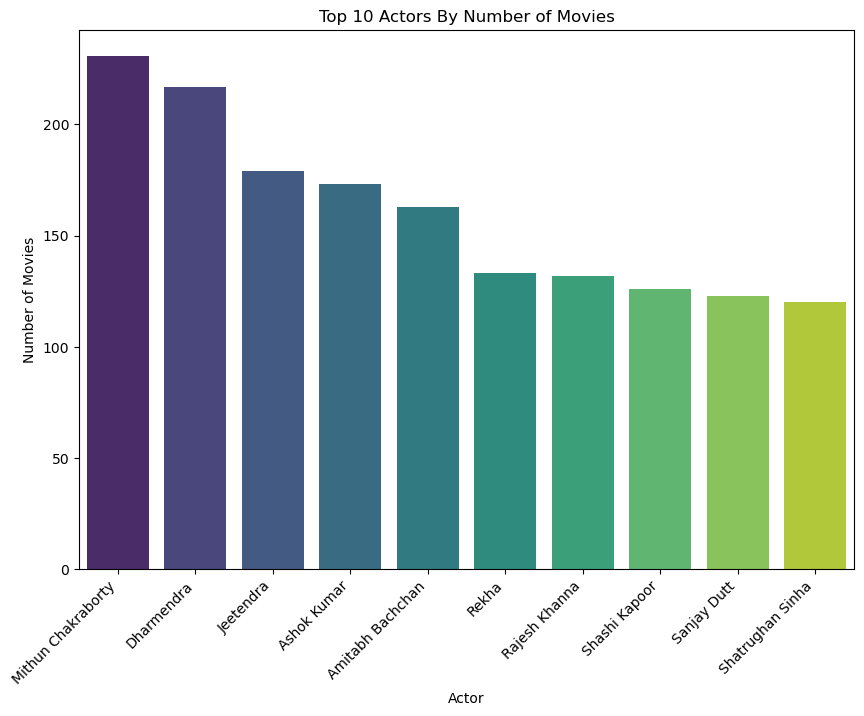

In [109]:
# Combine actor columns into a single 'Actors' column
actors_df = movie_df[['Actor 1', 'Actor 2', 'Actor 3']].stack().reset_index(level=1, drop=True).reset_index(name='Actor')
# Drop rows with missing actors
actors_df = actors_df.dropna(subset=['Actor'])
actors_df = actors_df[actors_df['Actor'] != 'Unknown']

# Count the number of movies for each actor
top_actors = actors_df['Actor'].value_counts().head(10)

# Plot the bar graph
plt.figure(figsize=(10, 7))
sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')
plt.title('Top 10 Actors By Number of Movies')
plt.xlabel('Actor')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

In [110]:
# Remove commas from the 'Votes' column

movie_df['Votes'].replace(',', '', regex=True, inplace=True)

### Top 10 Movies by Votes

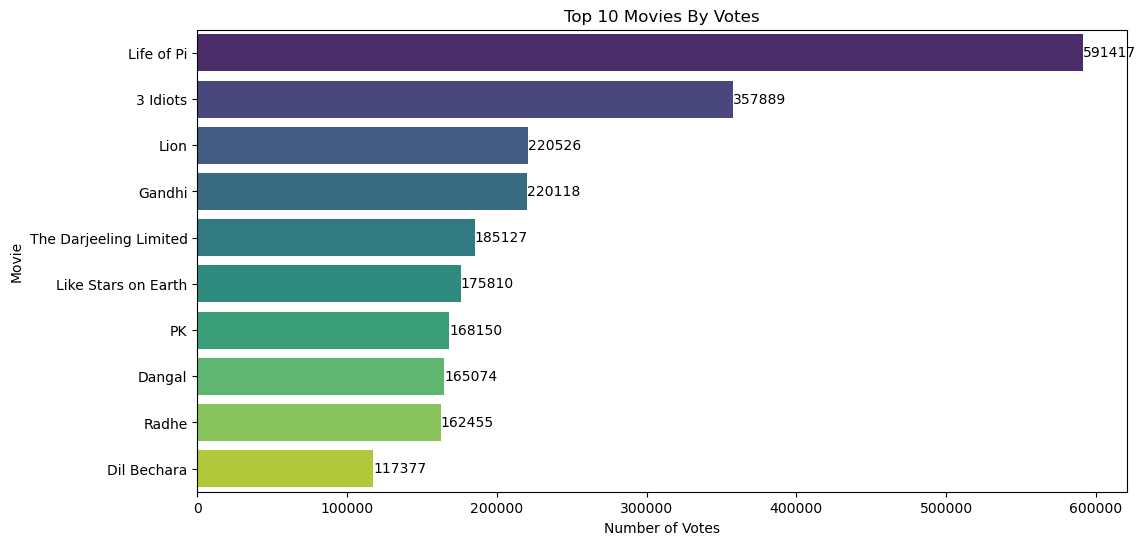

In [111]:
# Remove commas from the 'Votes' column and convert it to numeric
movie_df['Votes'] = pd.to_numeric(movie_df['Votes'].str.replace(',', ''), errors='coerce')

# Sort the DataFrame by the 'Votes' column in descending order
top_movies = movie_df.sort_values(by='Votes', ascending=False).head(10)

# Plot the bar graph with labels
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=top_movies['Votes'], y=top_movies['Name'], palette='viridis')

# Add labels to the bars
for index, value in enumerate(top_movies['Votes']):
    bar_plot.text(value, index, f'{value:.0f}', ha='left', va='center', fontsize=10, color='black')

plt.title('Top 10 Movies By Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Movie')
plt.show()

### Top 10 Movies by Genre

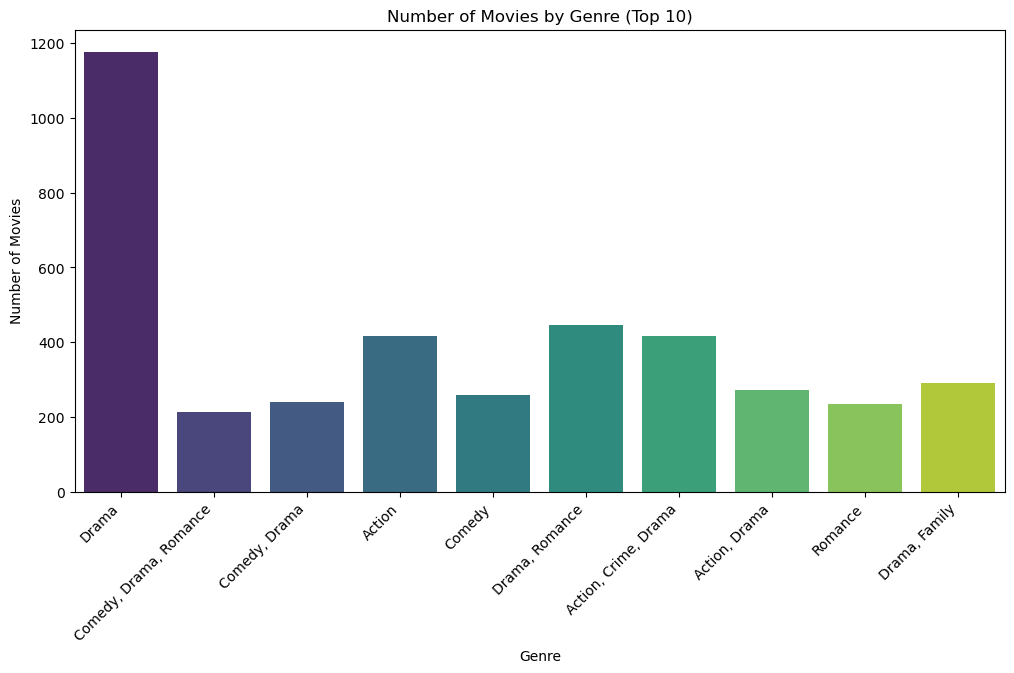

In [143]:
# Get the top 10 genres by count
top_genres = movie_df['Genre'].value_counts().head(10).index

# Filter the DataFrame for the top 10 genres
filtered_df = movie_df[movie_df['Genre'].isin(top_genres)]

# Create a count plot for the top 10 genres
plt.figure(figsize=(12, 6))
sns.countplot(x='Genre', data=filtered_df, palette='viridis')
plt.title('Number of Movies by Genre (Top 10)')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

### Correlation of Duration,Votes,Rating

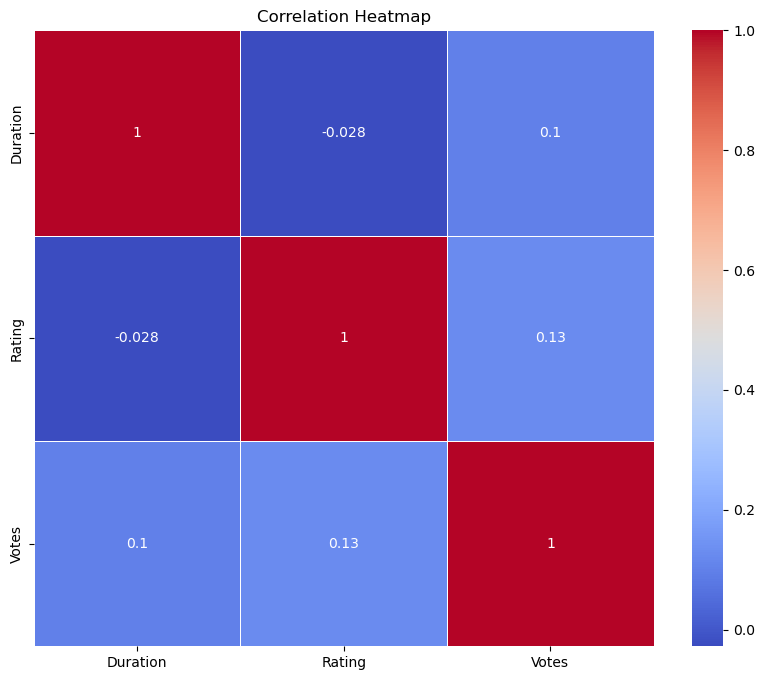

In [113]:

# Calculate the correlation matrix
correlation_matrix = movie_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

### Paring Votes, Rating , Duration

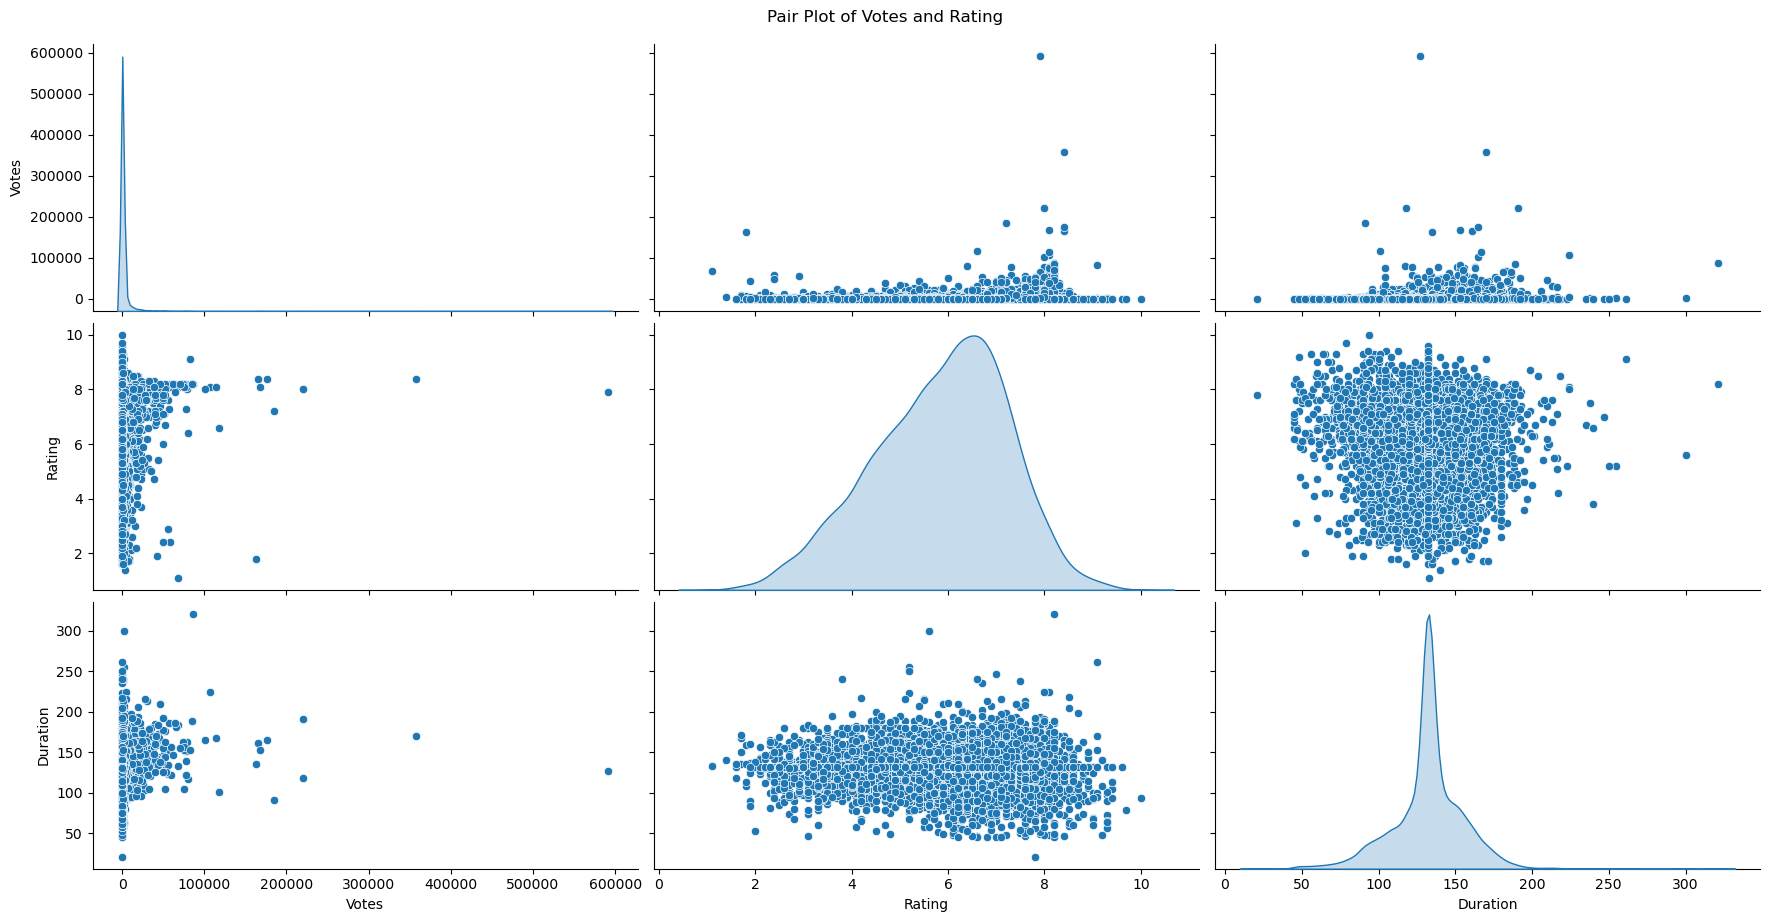

In [115]:
# Select the relevant columns for pair plot
selected_columns = ['Votes', 'Rating','Duration']

# Create a pair plot
sns.pairplot(movie_df[selected_columns].dropna(), diag_kind='kde', markers='o', palette='viridis', height=3, aspect=2)
plt.suptitle('Pair Plot of Votes and Rating', y=1.02)
plt.show()

### Movie Duration Over the Year

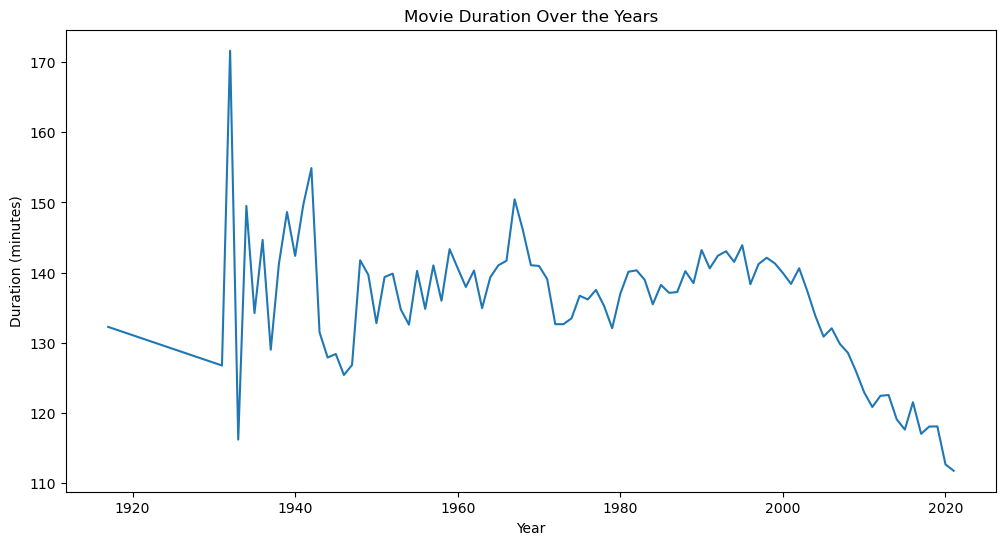

In [116]:
# Plot the line graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Duration', data=movie_df, ci=None)
plt.title('Movie Duration Over the Years')
plt.xlabel('Year')
plt.ylabel('Duration (minutes)')
plt.show()

### Applying Feature Engineering

In [125]:
sorted_ds=movie_df.sort_values(by='Votes',ascending= False)
sorted_ds['vote_count']=sorted_ds['Votes'].rank(pct=True)*100
sorted_ds.reset_index(drop=True)
sorted_ds = sorted_ds[['Name', 'Votes','Rating', 'vote_count']].reset_index(drop=True)
print(sorted_ds)

                        Name   Votes  Rating  vote_count
0                 Life of Pi  591417     7.9  100.000000
1                   3 Idiots  357889     8.4   99.987207
2                       Lion  220526     8.0   99.974415
3                     Gandhi  220118     8.0   99.961622
4     The Darjeeling Limited  185127     7.2   99.948829
...                      ...     ...     ...         ...
7812             Qurbaniyaan       5     3.2    0.940258
7813            Vikram Vetal       5     6.8    0.940258
7814             Vinash Kaal       5     5.0    0.940258
7815           Match Of Life       5     5.4    0.940258
7816     Lorni - The Flaneur       5     7.0    0.940258

[7817 rows x 4 columns]
